In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from matplotlib.pyplot import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Cargamos el dataset
df= pd.read_csv("/content/geor.csv")
# Descripción genereal del conjunto de datos
df.describe()

,latitud,longitud
count,187.000000,187.000000
mean,4.721811,-74.073806
std,0.073056,0.046181
min,4.543164,-74.241942
25%,4.676208,-74.097762
50%,4.732370,-74.059450
75%,4.757585,-74.037777
max,5.017259,-73.994392


In [ ]:
df.head()

,Dirección,latitud,longitud
0,"CL 185 A BIS 8 58, USAQUEN",4.761922,-74.030086
1,"DUAG 77 B 116 B 42, ENGATIVA",4.722653,-74.128538
2,"DIAG 1 6 65, SAN CRISTOBAL",4.722653,-74.128538
3,"CALLE 65 B BIS SUR # 77 K 33, BOSA",4.599085,-74.183101
4,"CALLE 43 18 21 APTO 101, CHAPINERO",4.631441,-74.071485


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Dirección  187 non-null    object 
 1   latitud    187 non-null    float64
 2   longitud   187 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.5+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitud,187.0,4.721811,0.073056,4.543164,4.676208,4.73237,4.757585,5.017259
longitud,187.0,-74.073806,0.046181,-74.241942,-74.097762,-74.05945,-74.037777,-73.994392


In [ ]:
datas = df.iloc[: , [1,2]].values
print(datas[:10])

[[  4.76192 -74.03009]
 [  4.72265 -74.12854]
 [  4.72265 -74.12854]
 [  4.59908 -74.1831 ]
 [  4.63144 -74.07149]
 [  4.63144 -74.07149]
 [  4.64228 -74.09071]
 [  4.67369 -74.14367]
 [  4.60373 -74.18209]
 [  4.57952 -74.15743]]


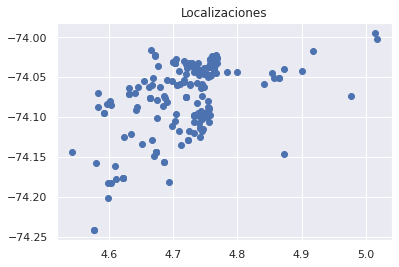

In [ ]:
plt.scatter(datas[:,0], datas[:,1])
plt.title('Localizaciones')
plt.show()

In [ ]:
Z=linkage(datas, method="ward")

Z

array([[  1.     ,   2.     ,   0.     ,   2.     ],
       [  4.     ,   5.     ,   0.     ,   2.     ],
       [  7.     ,  14.     ,   0.     ,   2.     ],
       [ 48.     ,  49.     ,   0.     ,   2.     ],
       [ 50.     , 190.     ,   0.     ,   3.     ],
       [109.     , 110.     ,   0.     ,   2.     ],
       [ 15.     , 189.     ,   0.     ,   3.     ],
       [ 16.     , 193.     ,   0.     ,   4.     ],
       [ 71.     , 125.     ,   0.     ,   2.     ],
       [148.     , 195.     ,   0.     ,   3.     ],
       [119.     , 120.     ,   0.     ,   2.     ],
       [ 18.     ,  19.     ,   0.     ,   2.     ],
       [ 58.     ,  59.     ,   0.     ,   2.     ],
       [ 67.     ,  69.     ,   0.     ,   2.     ],
       [ 36.     ,  37.     ,   0.     ,   2.     ],
       [103.     , 159.     ,   0.     ,   2.     ],
       [163.     , 202.     ,   0.     ,   3.     ],
       [176.     , 203.     ,   0.     ,   4.     ],
       [ 42.     ,  43.     ,   0.     ,   2. 

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


c, coph_dists = cophenet(Z,pdist(datas))
print(c)

0.591189009225403


In [ ]:
Y=linkage(datas, method="single", metric="euclidean")

Y

array([[ 58.     ,  59.     ,   0.     ,   2.     ],
       [ 67.     ,  69.     ,   0.     ,   2.     ],
       [119.     , 120.     ,   0.     ,   2.     ],
       [ 18.     ,  19.     ,   0.     ,   2.     ],
       [103.     , 159.     ,   0.     ,   2.     ],
       [163.     , 191.     ,   0.     ,   3.     ],
       [176.     , 192.     ,   0.     ,   4.     ],
       [ 36.     ,  37.     ,   0.     ,   2.     ],
       [  1.     ,   2.     ,   0.     ,   2.     ],
       [  4.     ,   5.     ,   0.     ,   2.     ],
       [ 71.     , 125.     ,   0.     ,   2.     ],
       [148.     , 197.     ,   0.     ,   3.     ],
       [164.     , 165.     ,   0.     ,   2.     ],
       [184.     , 199.     ,   0.     ,   3.     ],
       [  7.     ,  14.     ,   0.     ,   2.     ],
       [ 15.     , 201.     ,   0.     ,   3.     ],
       [ 16.     , 202.     ,   0.     ,   4.     ],
       [109.     , 110.     ,   0.     ,   2.     ],
       [ 48.     ,  49.     ,   0.     ,   2. 

In [ ]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


c, coph_dists = cophenet(Y,pdist(datas))
print(c)

0.8166908631066369


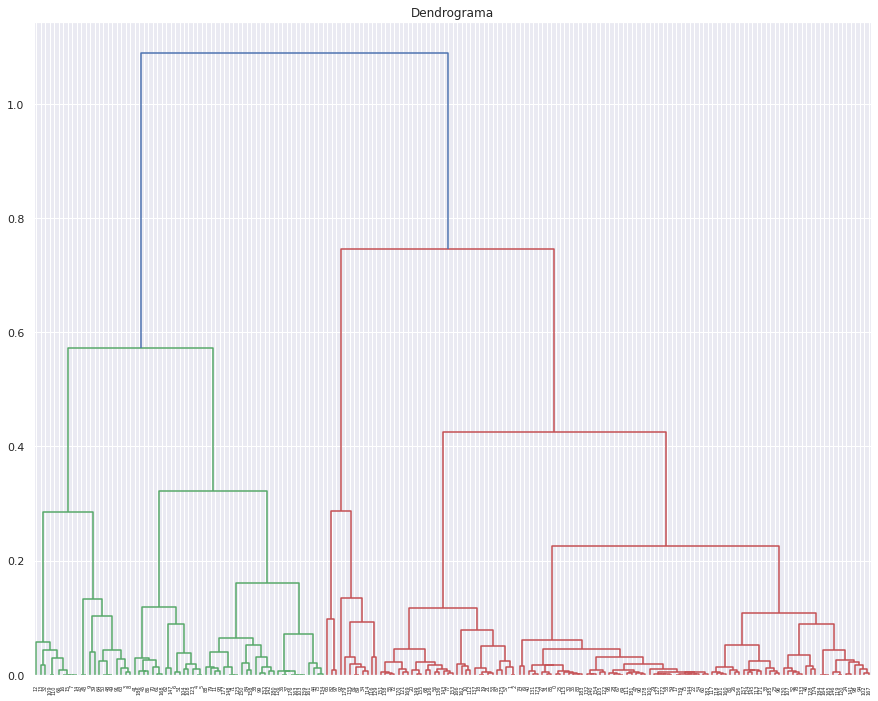

In [ ]:
plt.figure(figsize=(15, 12))
plt.title('Dendrograma')
dendrogram(Z)
plt.show()

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

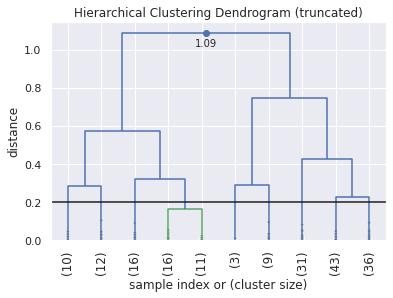

In [ ]:
d_max = 0.2


fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster= AgglomerativeClustering(n_clusters=13, affinity="euclidean", linkage="ward" )
clusters=cluster.fit_predict(datas)
print(clusters)

[ 8  0  0  5  4  4  4  7  5  5  0  9  7  7  7  7  7  8  0  0  0  0  8  2
  2  8  2  8  8  8  8  8  7  2  1  8  3  3  9  5  8 12 11 11  3 12  2  8
  5  5  5  4  2  0  8  0  0  0  8  8  8 12  4  5  5  6  7  8  0  8 12  9
  0  3  8  8  8  0  2  9  2  1  6  8  9  8 12  0  9  1  8  5 10  9  2  8
  2  6  2  9  8  2  2  3  4  8  0  2  4  7  7  8  0  2  1  8  1  2  2  2
  2  0  8  4  2  9  3  8  2  1  2  8  8  2  3  1  0  0  0  8  8  2  9  0
  8  2  2  4  9  0  9  0  9  0  8  0  2  2  9  3  2  3  0  3  2  2  0  2
 12  0  0  2  8  8  2  0  3  9  8  1  9  8  8  8  2  2 12]


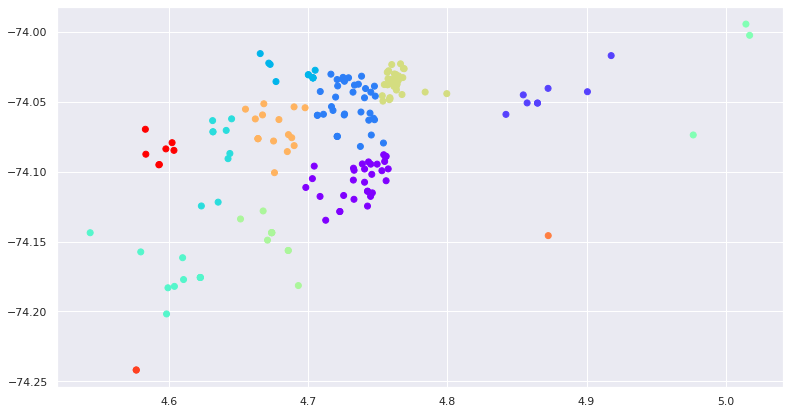

In [ ]:
plt.figure(figsize=(13, 7))
plt.scatter(datas[:,0], datas[:,1], c=cluster.labels_, cmap='rainbow')

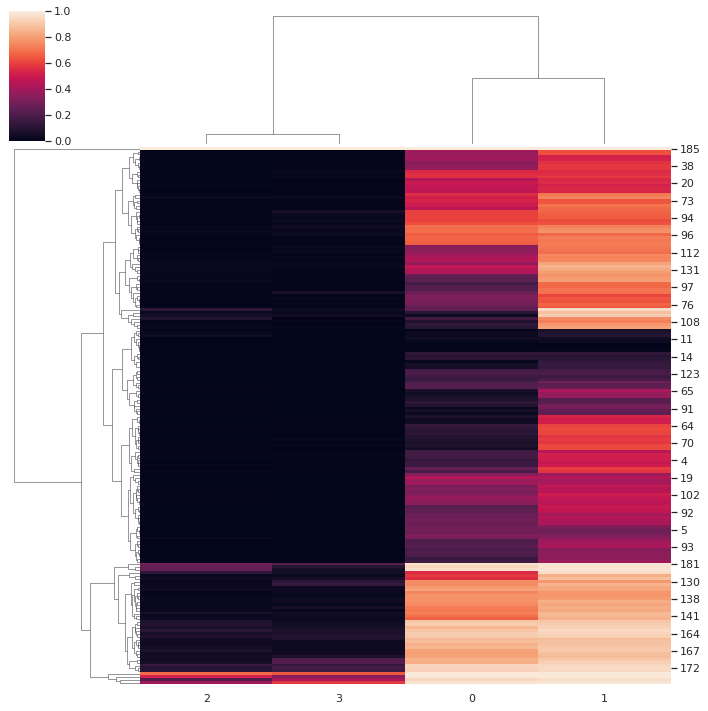

In [ ]:
import seaborn as sns
sns.set(color_codes=True)
sns.clustermap(Z, standard_scale=1)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
kmeans =KMeans(n_clusters=13,random_state=0)
clusters =kmeans.fit_predict(datas.data)
kmeans.cluster_centers_.shape

(13, 2)

In [ ]:
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 20):
    km = KMeans(i, init='random', n_init=10, max_iter=300, tol=1e-4, random_state=42)
    clustering = km.fit_predict(datas.data)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(datas.data, clustering))

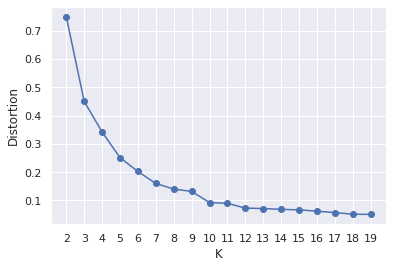

In [ ]:
plt.plot(range(2,20), distortions, marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()

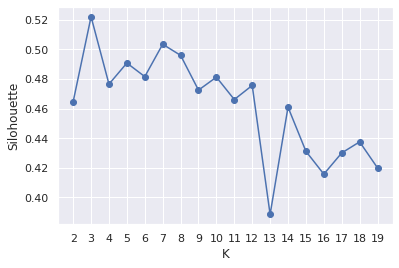

In [ ]:
plt.plot(range(2,20), silhouettes , marker='o')
plt.xticks(range(2, 20))
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler =StandardScaler()
datas_scaled = scaler.fit_transform(datas)

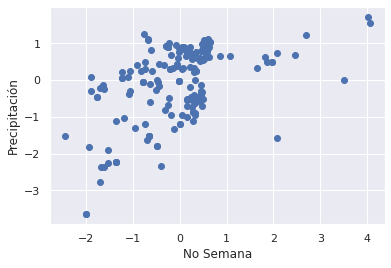

In [ ]:
# plot
plt.scatter(datas_scaled[:, 0], datas_scaled[:, 1])
plt.xlabel("No Semana")
plt.ylabel("Precipitación")
plt.show()

Text(0, 0.5, 'Feature 1')

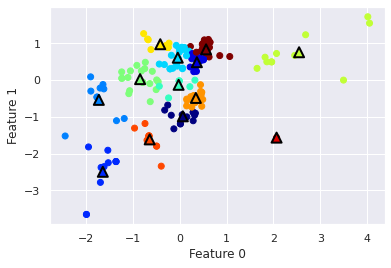

In [ ]:

kmeans = KMeans(n_clusters=13, init="random", n_init=1)
y_pred = kmeans.fit_predict(datas_scaled)


plt.scatter(datas_scaled[:, 0], datas_scaled[:, 1], c=y_pred, cmap="jet")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
            s=100, 
            linewidth=2,
            edgecolor='black',
            cmap="jet")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:

dbscan =DBSCAN(eps=0.15,min_samples=2)
clusters = dbscan.fit_predict(datas_scaled)

Text(0, 0.5, 'Feature 1')

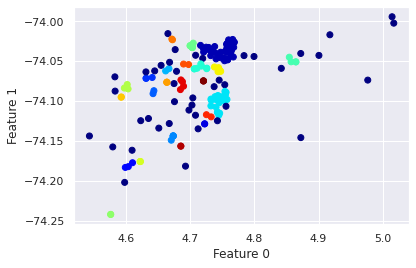

In [ ]:
# plot the cluster assignments
plt.scatter(datas[:, 0], datas[:, 1], c=clusters, cmap='jet')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")